In [1]:
import pandas as pd

# 데이터 로딩
file_path = "C:/files/heart.csv"

df = pd.read_csv(file_path)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [3]:
# 결측치 확인
df.isnull().sum()

#결측치가 있다면 제거
#df = df.dropna()
#df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
# 레이블 확인
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [5]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h3>딥러닝</h3>

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [8]:
# 원-핫 인코딩: 데이터의 연관성 제거
Y = pd.get_dummies(y).values

In [9]:
X = X.values

In [10]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242, 2), (61, 2))

In [12]:
# 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

# 모델 생성
model = Sequential()

# 입력층 + 첫 번째 은닉층
model.add(Dense(16, input_shape=(13,), activation='relu'))

# 두 번째 은닉층
model.add(Dense(20, activation='relu'))

# 세 번째 은닉층
model.add(Dense(20, activation='relu'))

# 출력층 (뉴런 2개, sigmoid 활성화)
model.add(Dense(2, activation='sigmoid'))

# 다중 클래스 분류(Multi-class, Single-Label), 손실 함수로 categorical_crossentropy 사용
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

C:\Users\jaemin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             340 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,026 (4.01 KB)

 Trainable params: 1,026 (4.01 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model_history=model.fit(x=X_train, y=y_train, epochs=13, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.4374 - loss: 0.7248 - val_accuracy: 0.5200 - val_loss: 0.6448
Epoch 2/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6901 - loss: 0.5644 - val_accuracy: 0.9200 - val_loss: 0.3947
Epoch 3/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8191 - loss: 0.4274 - val_accuracy: 0.9200 - val_loss: 0.2647
Epoch 4/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8344 - loss: 0.3887 - val_accuracy: 0.9200 - val_loss: 0.2043
Epoch 5/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8698 - loss: 0.3284 - val_accuracy: 0.9200 - val_loss: 0.1872
Epoch 6/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8867 - loss: 0.2950 - val_accuracy: 0.9200 - val_loss: 0.1958
Epoch 7/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8885 - loss: 0.2958 - val_accuracy: 0.9200 - val_loss: 0.1893
Epoch 8/13
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9128 - loss: 0.2565 - val_accuracy: 0.9200 - val_loss: 0.2225


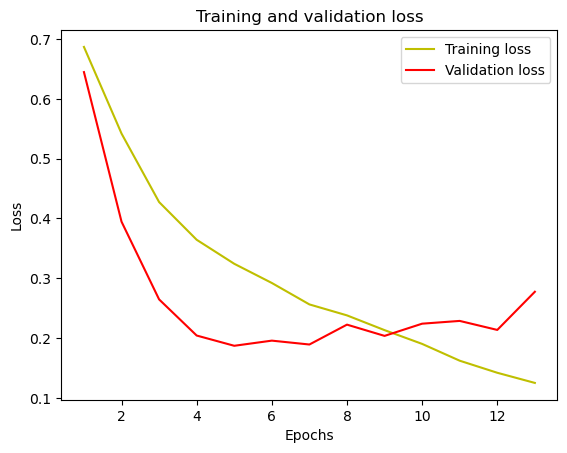

In [18]:
import matplotlib.pyplot as plt

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

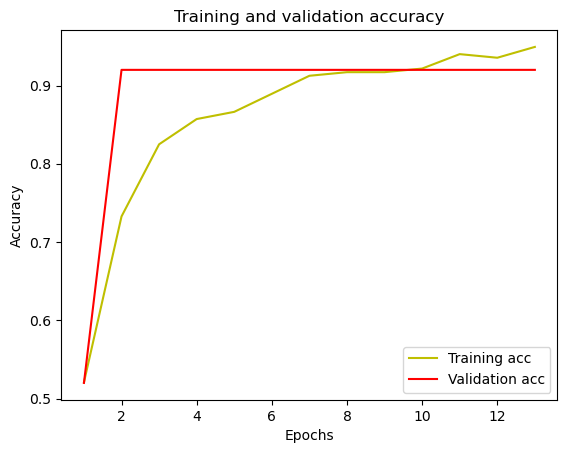

In [20]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')  # 훈련 정확도
plt.plot(epochs, val_acc, 'r', label='Validation acc')  # 검증 정확도
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

[[23  4]
 [ 4 30]]
